## Matricule & noms : 
`David-Olivier Roy - xxx`
  
`Amine Melbouci    - xxx`  
  
`Marc-Antoine Huet - xxx`

### <center> ELE8812 - Traitement et analyse d'images </center>
<center> Travail practique No. 2 </center>
<center>Hiver 2021 </center>

<div class="alert alert-block alert-danger">
Ce <a href="https://realpython.com/matlab-vs-python/"> lien</a> vous permettra de voir les diff√©rences fondamentales entre Python et Matlab. Ne passez pas forcement par les √©tapes d'installation.
</div>

Ce travail pratique a pour objet de vous permettre de vous familiariser avec la manipulation de  repr√©sentations  fr√©quentielles  discr√®tes  des  images.  Il  vous  donnera  √©galement l‚Äôoccasion de mettre en ≈ìuvre certains traitements vus en cours et de les comparer avec leur √©quivalent dans le domaine spatial. Trois points seront abord√©s:
<b>
1. La repr√©sentation fr√©quentielle
2. Le rehaussement dans le domaine de fourier
3. Le d√©tramage par r√©jection de fr√©quences
</b>

Les donn√©es √† utiliser pour effectuer ce travail pratique se trouvent dans l‚Äôarchive <I>TP2.zip</I> disponible sur le site web du cours. 

<b>Pond√©ration</b> 
-  Repr√©sentation fr√©quentielle : 4 pts 
-  Rehaussement dans le domaine de Fourier: 7 pts 
-  D√©tramage par r√©jection de fr√©quences : 7 pts 
-  Qualit√©s de la langue et du rapport : 2 pts 
-  <b>Total : 20 points</b> 

<b>Date de remise</b>  
- Groupe 1: 28 f√©vrier 23h59  
- Groupe 2: 7 mars 23h59  

<div class="alert alert-block alert-info">


La cellule ci dessous effectue des <code>import</code> cela s'assimile a un<code>addpath</code> en matlab. Le but est d'amener des fonctions ext√©rieures (packages) dans le notebook afin que Python les reconnaisse.  
<code> import package as pkg</code> permet de raccourcir le nom de ce dernier. Les fonctions contenues dans 'package' seront alors appel√©es ainsi <code>pkg.function()</code><br>
    
Vous pouvez chercher sur google chacun des package appel√©s ci-dessous afin d'obtenir leur documentation.<br>

N'oubliez pas de relancer cette cellule si jamais vous redemarrez le Kernel !!
</div>

In [25]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.pyplot import imread
import cv2
import numpy as np
from pylab import ginput
from scipy import signal
import matplotlib
from scipy.ndimage import convolve

%matplotlib inline
plt.rcParams["figure.figsize"] = (12, 10)

##  1. Repr√©sentation fr√©quentielle (4 pts)

Repr√©senter  et  interpr√©ter  correctement  une  image  dans  le  domaine  fr√©quentiel  est  un 
pr√©alable indispensable √† tout traitement dans ce domaine. Cette question vous permettra 
de vous familiariser avec la repr√©sentation spectrale des images. 

### 1.1. Indexation des axes fr√©quentiels (2 pts)

<div class="alert alert-block alert-warning">




Chargez l‚Äôimage <I>Voiture.tif</I> et repr√©sentez-la dans le domaine spectral (<I>fft2</I>) selon 
la convention usuelle (fr√©quence nulle au voisinage du centre de l‚Äôimage). Indexez les axes 
en fr√©quences r√©duites (comprises entre ‚àí1/2 et 1/2).

<b>Note</b> :
Par convention, la fonction <I>fft2</I> de numpy ordonne les fr√©quences de 0 &rarr; N/2, puis de ‚ÄìN/2 + 1 &rarr; -1 pour chaque dimension de la matrice transform√©e. On pourra utiliser la fonction <I>fftshift</I> de numpy pour placer la fr√©quence nulle au centre de l‚Äôimage. Consulter l‚Äôaide de cette fonction pour plus de d√©tails (<I>doc [fftshift](https://numpy.org/doc/stable/reference/generated/numpy.fft.fftshift.html)</I>). Vous pouvez appeler la fonction comme suit: 
    
 <code>np.fft.fft2</code>  <code>np.fft.fftshift</code>

Pour augmenter le contraste de la fft, il est possible de normaliser en faisant 1 + log(FFT) pour mieux discerner les intensit√©s.
</div>

Text(0.5, 1.0, 'FFT contraste')

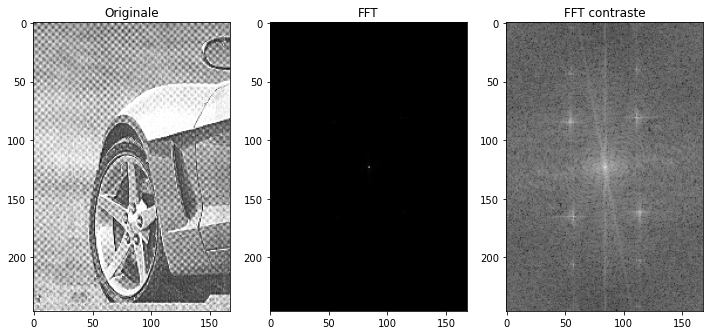

In [5]:
img=plt.imread('Voiture.tif')
plt.subplot(1,3,1)#Image originale
plt.title("Originale")
plt.imshow(img, cmap='gray')
b = np.fft.fft2(img)
c = np.fft.fftshift(abs(b))
plt.subplot(1,3,2)#Image FFT
plt.imshow(c, cmap='gray')
plt.title("FFT")
plt.subplot(1,3,3)#Image FFT avec contraste normalis√©
d = (np.log(c))+1
plt.imshow(d, cmap='gray')
plt.title("FFT contraste")


<div class="alert alert-block alert-warning">

Donnez, en fr√©quences r√©duites puis en nombres de pixels, les coordonn√©es des 9 ¬´ points brillants ¬ª dont l‚Äôamplitude est la plus grande. Vous pouvez utiliser la function `ginput` qui vous permettra de cliquer sur les points les plus brillants de l'image pour en retirer les coordonn√©es.</div>

[(54.15215180949926, 42.77473614999289), (110.51336026625634, 40.106749950856454), (54.15215180949926, 84.79551878639163), (110.51336026625634, 81.12703776257905), (83.83349827489204, 122.48082384919368), (56.4866397337436, 165.16860303537658), (113.84834301517688, 162.5006168362401), (57.15363628352773, 206.18889084709917), (113.51484474028481, 203.18740637307067)]


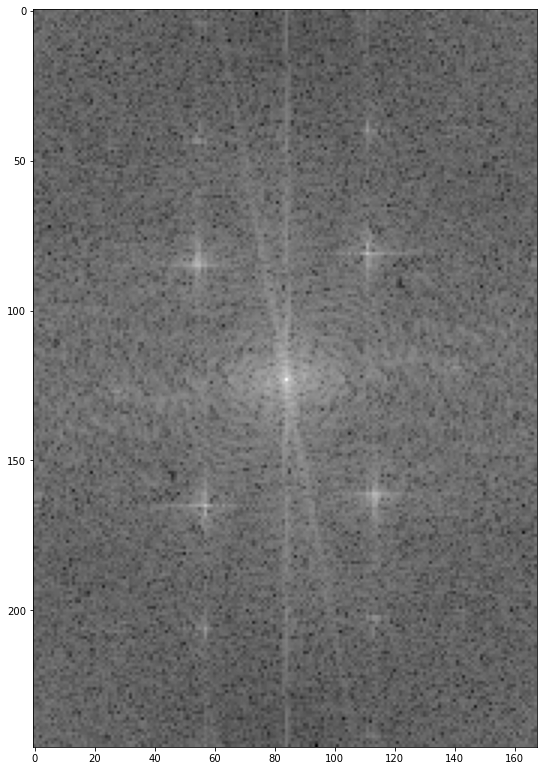

In [22]:
# Ceci sera n√©cessaire pour utiliser ginput dans le jupyter notebook
matplotlib.use('TkAgg')
plt.imshow(d, cmap='gray')
x = plt.ginput(9) 
print(x) 



(56.438189845474625, 206.58167770419425),  
<bv>
(113.45805739514353, 203.4139072847682),  
<bv>
(57.343267108167794, 164.94812362030905),  
<bv>
(113.45805739514353, 161.78035320088298),  
<bv>
(84.0430463576159, 122.86203090507726),  
<bv>
(53.72295805739515, 84.39624724061812),  
<bv>
(111.19536423841063, 80.32339955849892),  
<bv>
(110.74282560706405, 40.047461368653444),  
<bv>
(55.0805739514349, 43.21523178807948)


### 1.2. Effet de la parit√© des dimensions sur l‚Äôimage (2 pts)
<div class="alert alert-block alert-warning">


Appliquez la fonction <I>ifftshift</I> √† la repr√©sentation fr√©quentielle de l‚Äôimage obtenue  √†  la  question  pr√©c√©dente,  puis  prenez-en  la  transform√©e  de  Fourier  inverse (<I>ifft2</I>). L'image contiendra des nombres complexes. Pour obtenir les intensit√©s, il faut appliquer <I>np.real</I> pour conserver seulement les nombres r√©els.  Comparez  le  r√©sultat  √†  l‚Äôimage  de  d√©part. Vous pouvez appeler la fonction comme suit: 
<code>np.fft.ifftshift</code>   <code>np.fft.ifft2</code>  <code>np.real</code>  </div>


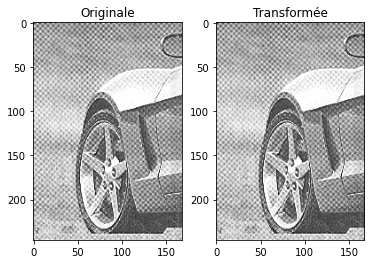

In [8]:
z=np.fft.fft2(img)
y=np.fft.fftshift(z)

# Garder cette ligne une fois que vous n'utilisez plus ginput
%matplotlib inline

e=np.fft.ifftshift(y)
f=np.fft.ifft2(e)
g=np.real(f)
plt.subplot(1,2,1)#Image originale
plt.title("Originale")
plt.imshow(img, cmap='gray')
plt.subplot(1,2,2)#Image transform√©e
plt.title("Transform√©e")
plt.imshow(g, cmap='gray')



<div class="alert alert-block alert-warning">
Appliquez  maintenant  la  fonction 
<I>fftshift</I>  (plut√¥t  que  <I>ifftshift</I>)  de  numpy  √†  la  repr√©sentation  fr√©quentielle  de 
l‚Äôimage obtenue √† la question pr√©c√©dente, puis prenez-en la transform√©e de Fourier inverse. 
Comparez le r√©sultat √† l‚Äôimage de d√©part.</div>

Text(0.5, 1.0, 'Transform√©e')

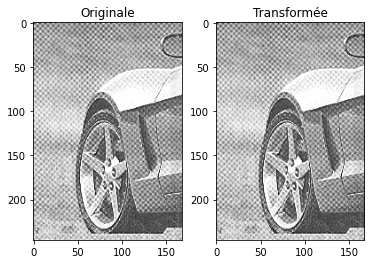

In [24]:
h=np.fft.fftshift(y)
i=np.fft.ifft2(h)
j=np.real(i)
plt.subplot(1,2,1)#Image originale
plt.title("Originale")
plt.imshow(img, cmap='gray')
plt.subplot(1,2,2)#Image transform√©e
plt.imshow(j, cmap='gray')
plt.title("Transform√©e")


<div class="alert alert-block alert-warning">
- Que constatez-vous ? 
</div>

<div class="alert alert-block alert-success"> 
    On constate qu'avec les deux m√©thodes, l'image retrouve son √©tat initial identique √† l'image de d√©part. L'erreur carr√©e moyenne est ainsi nulle, ce qui explique les m√™mes dimensions et le m√™me r√©sultat obtenu.
</div>

<div class="alert alert-block alert-warning">


Supprimez une ligne et une colonne de l‚Äôimage <I>Voiture.tif</I> et effectuez de nouveau les  op√©rations  d√©crites  dans  le  paragraphe pr√©c√©dent.

Vous pouvez vous aider de la function ```numpy.delete(arr, obj, axis=None)``` </div>

Text(0.5, 1.0, 'Transform√©e')

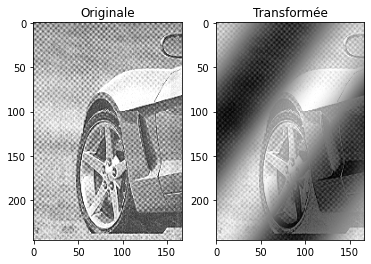

In [25]:
delLine = np.delete(img,100,0) # Delete la 100e ligne
imgDel = np.delete(delLine,100,1) # Delete la 100e colone

z=np.fft.fft2(imgDel)
y=np.fft.fftshift(z)

h=np.fft.fftshift(y)
i=np.fft.ifft2(h)
j=np.real(i)

plt.subplot(1,2,1)#Image originale
plt.imshow(imgDel, cmap='gray')
plt.title("Originale")

plt.subplot(1,2,2)#Image transform√©e
plt.imshow(j, cmap='gray')
plt.title("Transform√©e")


<div class="alert alert-block alert-warning">
- Que constatez-vous maintenant? Expliquez  </div>

<div class="alert alert-block alert-success"> 
    Cette fois-ci la reconstruction fait que l'image n'est pas la m√™me au niveau des constrates. En supprimant une colonne ainsi qu'une ligne les dimensions ne sont plus paires. De plus, la transformation en domaine fr√©quentielle n'offre plus donc plus les m√™me r√©sultats que pour l'image diff√©rente. La r√©partition des fr√©quences pour ajuster les dimensions de l'image cr√©e ces diff√©rences de constrastes. L'apparition d'un bruit p√©riodique se fait alors pr√©sent. 
</div>

## 2. Rehaussement dans le domaine de Fourier (7 pts)
### 2.1. Rehaussement par masquage flou (3 pts) 

<div class="alert alert-block alert-warning">

Chargez l‚Äôimage <b><I>Lune2.tif</I></b> et mettez en ≈ìuvre un rehaussement par masquage flou dans le domaine de Fourier (voir section 3.2 du TP1 pour un rappel sur le rehaussement par masquage flou. Formule: G = ùêπ + ùëé [ ùêπ ‚àí ùêπ‚Ä≤ ]). Pour cela, utilisez un filtre Butterworth ou gaussian passe-bas, puis faites varier la fr√©quence de coupure et le coefficient de masquage. Utilisez les fonctions fournies:```filtpb_gaus``` et ```filtpg_butter```.</div>

In [20]:
def filtpb_gauss(A, fc):
    """ Application d'un filtre gaussien sur une image im √† une fr√©quence de coupure fc dans 
        le domaine fr√©quentiel
    
    A (ndarray): Image d'entr√©e
    fc (float): Fr√©quence de coupure
    """
    M, N = A.shape

    # Image dans le domaine fr√©quentiel
    AA = np.fft.fftshift(np.fft.fft2(A))

    M0 = np.ceil((M+1) / 2)
    N0 = np.ceil((N+1) / 2)

    U, V = np.mgrid[1:M+1, 1:N+1]
    D2 = (U - M0)**2 + (V - N0)**2
    
    # R√©ponse fr√©quentielle du filtre gaussien
    HH = np.exp(-D2 / (2 * fc**2))
    
    # Application du filtre et retour au domaine spatial
    BB = np.fft.ifftshift(AA * HH)
    B = np.fft.ifft2(BB)
    B = np.real(B)
    return B      


In [21]:
def filtpb_butter(A, fc, ordre):
    """ Application d'un filtre Butterworth sur une image im √† une fr√©quence de coupure fc dans 
        le domaine fr√©quentiel
    
    A (ndarray): Image d'entr√©e
    fc (float): Fr√©quence de coupure
    ordre (int): Ordre du filtre
    """
    M,N=A.shape

    # Image dans le domaine fr√©quentiel
    AA = np.fft.fftshift(np.fft.fft2(A))

    M0 = np.ceil((M+1) / 2)
    N0 = np.ceil((N+1) / 2)

    U, V = np.mgrid[1:M+1, 1:N+1]
    D2 = (U - M0)**2 + (V - N0)**2

    # R√©ponse fr√©quentielle du filtre Butterworth
    HH = 1 / (1 + (D2 / fc**2)**ordre)
    
    # Application du filtre et retour au domaine spatial
    BB = np.fft.ifftshift(AA * HH)
    B = np.fft.ifft2(BB)
    B = np.real(B)
    return B 

In [22]:
# Cr√©ation d'une fonction pour afficher les images en fonction des filtres s√©l√©ctionn√©s
def r_Fourrier(img, a, fc, filtre,ordre):
    if(filtre == "filtpb_butter"):
        F = filtpb_butter(img, fc, ordre)
    if(filtre == "filtpb_gauss"):
        F = filtpb_gauss(img, fc)
    
    F_ = F / np.max(F)
    img_ = img + a * (img - F_)
    return plt.imshow(img_,cmap='gray')

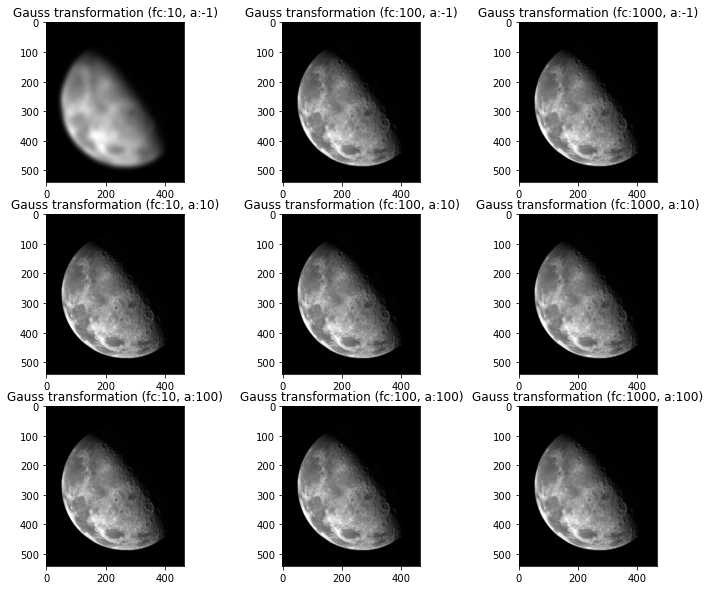

In [26]:
img=plt.imread('Lune2.tif')
# Test Gauss
fc = [10, 100, 1000,10, 100, 1000,10, 100, 1000]
a = [-1, -1, -1, 10, 10, 10,100, 100, 100]
for i in range(9):
    plt.subplot(3,3,i+1)
    r_Fourrier(img,a[i],fc[i],"filtpb_gauss", 2 )
    plt.title('Gauss transformation (fc:'+str(fc[i])+ ', a:' + str(a[i])+')')

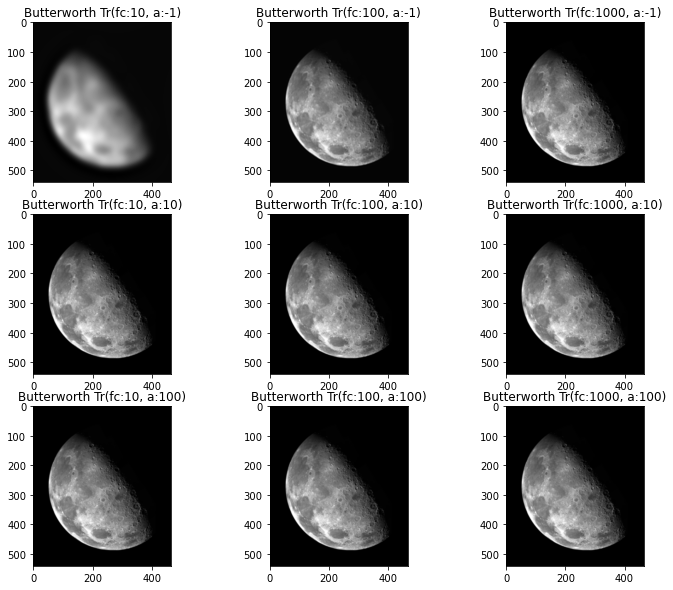

In [27]:
# Butterworth
img=plt.imread('Lune2.tif')
# Test Butter
fc = [10, 100, 1000,10, 100, 1000,10, 100, 1000]
a = [-1, -1, -1, 10, 10, 10,100, 100, 100]
for i in range(9):
    plt.subplot(3,3,i+1)
    r_Fourrier(img,a[i],fc[i],"filtpb_butter", 2 )
    plt.title('Butterworth Tr(fc:'+str(fc[i])+ ', a:' + str(a[i])+')')

<div class="alert alert-block alert-warning">
- Qu'observez-vous ?</div>

<div class="alert alert-block alert-success"> 
    √Ä travers les transformations de Gauss et de Butterworth on arrive au m√™me constat: en ayant une fr√©quence de coupure faible, on perd de la r√©solution et la nettet√© est inf√©rieure d'autant plus si le coefficient de masquage est faible. De plus, le coefficient de masquage plus est √©lev√©, plus il offre une meilleure claret√©. Cependant, c'est la fr√©quence de coupure qui a un plus grand impact sur la claret√© et la r√©solution d'une image. 
    Que ce soit par Gauss ou Butterworth, un filtre passe-bas a pour effet de filrer les bruits, donc en attribuant une fr√©quence de coupure faible, on filtre une grande quantit√© d'information de notre image. 
</div>

<div class="alert alert-block alert-warning">

Utilisez le script <I>unsharp_filter.m</I>, qui met en ≈ìuvre le rehaussement par masquage 
flou dans le domaine spatial √©tudi√© lors du TP1, et appliquez le filtrage √† l‚Äôimage de la lune. 
Comparez les deux approches (spatiale & fr√©quentielle), en ce qui concerne tant la mise en 
≈ìuvre que les r√©sultats. 
</div>

In [29]:
# On utilise √† titre d'exemple l'image filtre gaussian (Low-Pass Filter)
def unsharp_filter(img, taille_masque, coefficient_de_rehaussement):
    """ Rehaussement par masquage par flou dans le domaine spatial
    
    img (ndarray): Image d'entr√©e
    taille_masque (int): Taille du masque gaussien
    coefficient_de_rehaussement (float): a dans la formule du masquage par flou G = ùêπ + ùëé [ ùêπ ‚àí ùêπ‚Ä≤ ] 
    """
    a = coefficient_de_rehaussement
    Fprime = cv2.blur(img, (taille_masque, taille_masque))
    norm_Fprime = Fprime / np.max(Fprime)
    return img + a * (img - norm_Fprime)

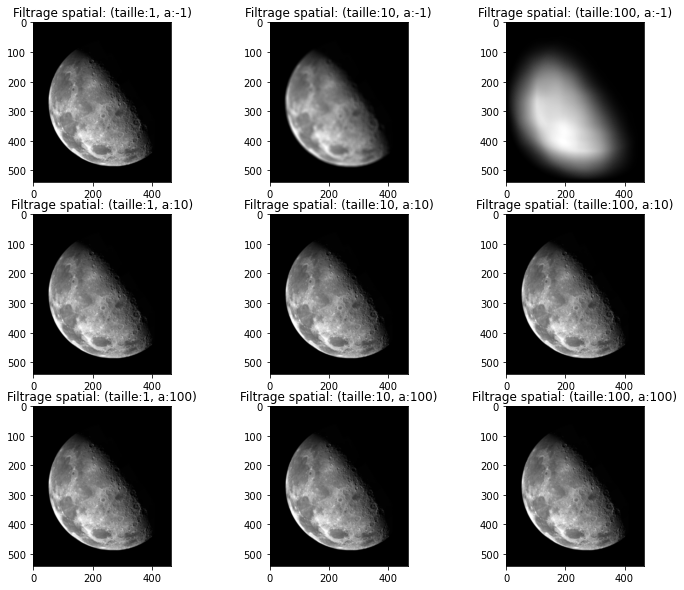

In [30]:
img=plt.imread('Lune2.tif')
size = [1, 10, 100, 1, 10, 100, 1, 10, 100]
a = [-1, -1, -1, 10, 10, 10,100, 100, 100]
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(unsharp_filter(img, size[i], a[i]),cmap='gray')
    plt.title('Filtrage spatial: (taille:'+str(size[i])+ ', a:' + str(a[i])+ ')')


<div class="alert alert-block alert-success"> 
    En ce qui concerne le filtrage dans le domaine spatial, on constate que plus la taille du filtre est √©lev√©, plus on perd de la claret√©. On arrive au m√™me constat qu'avec les approches du domaine fr√©quentiel. Il est √©vident que plus la taille du filtre est √©lev√©, plus des donn√©es seront filtr√©es et ainsi qu'une plus grande perte de donn√©es.
    En ce qui concdrne le coefficient de masquage a le m√™me effet que pour le domaine fr√©quentiel. 

</div>

### 2.2. Rehaussement par Laplacien (4 pts) 
<div class="alert alert-block alert-warning">


Mettez en ≈ìuvre le rehaussement par Laplacien dans le domaine spectral en programmant directement la forme donn√©e en cours.Il peut √™tre impl√©ment√© √† l‚Äôaide de l‚Äô√©quation suivante:

\begin{equation*}
\triangledown^2I(x,y)\xrightarrow{\text{F}}-4\pi^2D^2(u,v)\bullet I_F(u,v)
\end{equation*}

O√π  $ùêº_ùêπ (ùë¢, ùë£)$  est la repr√©sentation fr√©quentielle avec fr√©quence centr√©e de l‚Äôimage  $ùêº(ùë•, ùë¶)$  et  $ùê∑^2 (ùë¢, ùë£)$ la distance euclidienne au carr√©e entre les fr√©quences  $(ùë¢, ùë£)$  et la fr√©quence centrale. Cette formulation est √©quivalente √† la forme spatiale du filtre Laplacien en raison 
de la th√©orie de convolution de la transform√©e de Fourier. Pour plus de d√©tails, consulter les diapositives du cours 4. 
    
Vous pouvez vous inspirez du code des fonctions `filtpb_gauss` et `filtpb_butter` pour vous aider.
</div>

In [34]:
def r_Laplacien(img, a):
    """ Application d'un r√©haussement Laplacien sur l'image s√©lectionn√©e   
    img (ndarray): Image d'entr√©e
    a (integer): coefficient de floutage 
    """
    M,N=img.shape
    img_norm =img/np.max(img)

    # Image dans le domaine fr√©quentiel
    AA = np.fft.fftshift(np.fft.fft2(img))

    M0 = np.ceil((M+1) / 2)
    N0 = np.ceil((N+1) / 2)

    U, V = np.mgrid[1:M+1, 1:N+1]
    D2 = (U - M0)**2 + (V - N0)**2

    # R√©ponse fr√©quentielle du filtre √† partir de la relation de l'√©nonc√©
    HH = -4*(np.pi**2)*D2
    
    # Application du filtre et retour au domaine spatial
    BB = np.fft.ifftshift(AA * HH)
    B = np.fft.ifft2(BB)
    B = np.real(B)
    
    # Affichage de l'image avec r√©haussement Laplacien
    img_ =img/np.max(img)
    img_r_Laplacien = B/(np.max(B))
    
    # On ajoute les param√®tres vmin=0 et vmax=1 dans le imshow pour ne pas avoir l'effet gris sur les photos et pour pouvoir
    # mieux analyser les effets du r√©haussement Laplacien (Comme √©nonc√© dans la sous-question suivante)
    return plt.imshow((img_ + a * img_r_Laplacien),vmin=0, vmax=1, cmap="gray")

Text(0.5, 1.0, 'R√©haussement Laplacien spectral, a: 100')

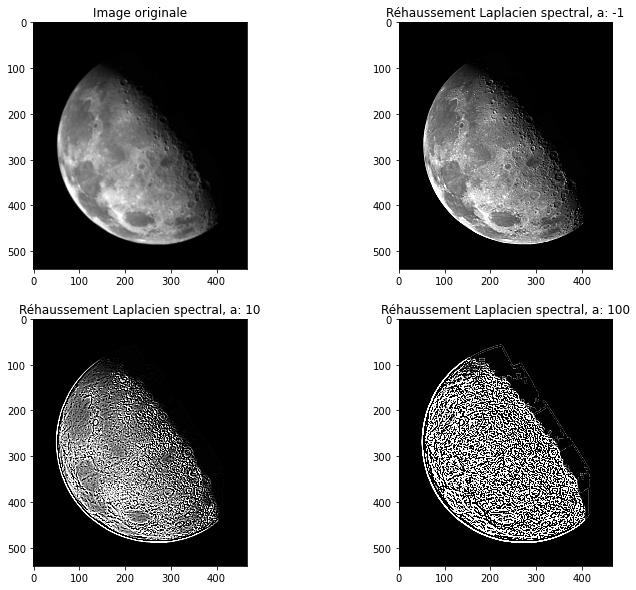

In [33]:
img=plt.imread('Lune2.tif')
plt.subplot(2,2,1)
plt.imshow(img, cmap="gray")
plt.title('Image originale')
plt.subplot(2,2,2)
r_Laplacien(img, -1)
plt.title('R√©haussement Laplacien spectral, a: -1')
plt.subplot(2,2,3)
r_Laplacien(img, 10)
plt.title('R√©haussement Laplacien spectral, a: 10')
plt.subplot(2,2,4)
r_Laplacien(img, 100)
plt.title('R√©haussement Laplacien spectral, a: 100')

<div class="alert alert-block alert-warning">
Mettez ensuite en ≈ìuvre le rehaussement par Laplacien dans le 
domaine spatial. Il peut √™tre impl√©ment√© √† l‚Äôaide des noyaux de convolution suivants : 
    
<center>  </center>

$$
\left[\begin{array}{ccc} 
0 &1 &0\\
1 &-4 &1\\
0 &1 &0\;
\end{array}\right]\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;
\left[\begin{array}{ccc} 
1 &1 &1\\
1 &-8 &1\\
1 &1 &1
\end{array}\right]
$$ 
    
Pour rehausser les contours dans le domaine spatial, le Laplacien doit √™tre soustrait √† l'image originale:
$I_{rehauss√©e} = I_{original} - I_{original} * noyau_{laplacien} $
    
Pour mieux visualiser l'effet du filtre laplacien, vous pouvez ajouter les param√®tres `vmin=0` et `vmax=1` √† la fonction plt.imshow pour obtenir l'affichage entre ces valeurs.
</div>
    


Text(0.5, 1.0, 'Laplacien spatial, noyau: -8')

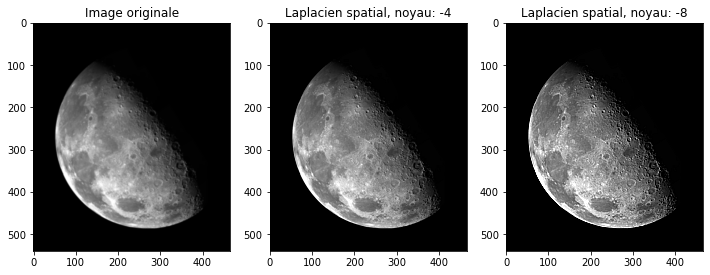

In [35]:
noyau_1 = np.array(( [0, 1, 0], [1, -4, 1], [0, 1, 0]),dtype=int)
noyau_2 = np.array(( [1, 1, 1], [1, -8, 1], [1, 1, 1]),dtype=int)

#Pour trouver les convolutions on utilise la fonction convolve
I_r_1 = img/np.max(img) - convolve(img/np.max(img), noyau_1)
I_r_2 = img/np.max(img) - convolve(img/np.max(img), noyau_2)

#Affichage des images avec r√©haussement Laplacien dans le domaine spatial
img=plt.imread('Lune2.tif')
plt.subplot(1,3,1)
plt.imshow(img, cmap="gray")
plt.title('Image originale')
plt.subplot(1,3,2)
plt.imshow(I_r_1, vmin=0, vmax=1, cmap="gray")
plt.title('Laplacien spatial, noyau: -4')
plt.subplot(1,3,3)
plt.imshow(I_r_2, vmin=0, vmax=1, cmap="gray")
plt.title('Laplacien spatial, noyau: -8')

<div class="alert alert-block alert-warning">



- Comparez les deux approches (spatial et spectral), en ce qui concerne tant la mise en ≈ìuvre que les r√©sultats.
    
</div>

<div class="alert alert-block alert-success"> 
    La mise en oeuvre du r√©haussement Laplacien dans le domaine spectrale utilise la multiplication, tandis que dans le domaine spatial, ce dernier utilise une convolution.
    Dans le domaine spectrale, on constate qu'il y a une emphase sur les d√©tails et les principalement les contours de l'image. Le contraste est plus √©lev√© au niveau des d√©tails d√©tect√©s sur l'image. Pour domaine spatial, on constate une clairet√© et nettet√© de l'image largement sup√©rieures. Plus le noyau de convolution semble grand et meilleure est la qualit√© de l'image. 
</div>

<div class="alert alert-block alert-warning">



- Enfin, comparez le rehaussement par Laplacien et le rehaussement par masquage flou. 
    
</div>

<div class="alert alert-block alert-success"> 
En vu des r√©sultats obtenus, on constate que le r√©haussement par masquage flou a principalement pour effet d'accentuer les d√©tails de l'image. L'utilisation de filtre permet entre autres de filtrer du bruit ou autre et par la m√™me occasion de filtrer certains d√©tails. Le r√©haussement par Laplacien lui aussi permet d'accentuer les d√©tails de l'image mais toutefois en portant une attention particuli√®re sur les contours d'un objet et de ses d√©tails. En effet, chaque d√©tail est plus "sharp" en fonction d'un noyau de convolution plus grand. 

</div>

## 3. D√©tramage par r√©jection de fr√©quences (7 pts)
On a vu √† la question 1 que la repr√©sentation fr√©quentielle de certaines images comporte 
des ¬´ points brillants ¬ª que l‚Äôon peut associer √† des trames qui d√©gradent l‚Äôimage de d√©part. 
L‚Äôam√©lioration de telles images peut donc √™tre obtenue en √©liminant ces points brillants, ce 
qui correspond √† la r√©jection de ¬´ zones fr√©quentielles ¬ª situ√©es autour des points brillants. 
Cette question a pour but de mettre en ≈ìuvre un tel filtrage.

<div class="alert alert-block alert-warning">


D√©veloppez une fonction permettant de filtrer les fr√©quences correspondantes aux points brillants. Attention, le centre du spectre de Fourier correspond √† la fr√©quence moyenne de l'image.
    
</div>

In [37]:
image = cv2.imread("Voiture.tif", cv2.IMREAD_GRAYSCALE)
fft1 = np.fft.fftshift(np.fft.fft2(image))

# S√©lection des points √† supprimer
image = cv2.imread("Voiture.tif", cv2.IMREAD_GRAYSCALE)
fft = np.fft.fftshift(np.fft.fft2(image))
fftAmp = np.log(np.abs(fft1) + 1)
matplotlib.use('TkAgg')
plt.imshow(fftAmp, cmap='gray')
coordinatesPixel = plt.ginput(8)

print("Coordonn√©es en pixel: \n")
for coordinate in coordinatesPixel:
    print("({:>6.2f}, {:>6.2f})".format(coordinate[0], coordinate[1]))
    
%matplotlib inline

Coordonn√©es en pixel: 

( 54.18,  43.22)
(111.20,  40.05)
(111.20,  80.78)
( 54.63,  84.85)
( 56.89, 166.31)
(113.91, 161.33)
(114.36, 202.06)
( 56.89, 206.58)


In [38]:
def freqRejectionFilterGauss(image, coordinatesPixel, D0):
    """ R√©jection de fr√©quences par filtre gaussien
    
    image (ndarray): Image d'entr√©e
    coordinatesPixel: pixels dont on veut supprimer le voisinage
    D0 (float): rayon du filtre gaussien
    """
    M, N = image.shape
    U, V = np.mgrid[1:M+1, 1:N+1]

    AA = np.fft.fftshift(np.fft.fft2(image))
    
    for coordinatePixel in coordinatesPixel:
        U0 = int(coordinatePixel[1])
        V0 = int(coordinatePixel[0])
        D2 = (U - U0)**2 + (V - V0)**2

        # R√©ponse fr√©quentielle du filtre gaussien
        HH = 1-np.exp(-D2 / (2 * D0**2))

        # Application du filtre et retour au domaine spatial
        AA = AA * HH
        
    BB = np.fft.ifftshift(AA)
    B = np.real(np.fft.ifft2(BB))
    
    return B, BB

In [39]:
def freqRejectionFilterButter(image, coordinatesPixel, D0, ordre):
    """ R√©jection de fr√©quences par filtre Butterworth
    
    image (ndarray): Image d'entr√©e
    coordinatesPixel: pixels dont on veut supprimer le voisinage
    D0 (float): rayon du filtre Butterworth
    ordre (int): ordre du filtre
    """
    M, N = image.shape
    U, V = np.mgrid[1:M+1, 1:N+1]

    AA = np.fft.fftshift(np.fft.fft2(image))
    
    for coordinatePixel in coordinatesPixel:
        U0 = int(coordinatePixel[1])
        V0 = int(coordinatePixel[0])
        D2 = (U - U0)**2 + (V - V0)**2

        # R√©ponse fr√©quentielle du filtre gaussien
        HH = 1- 1 / (1 + (D2 / D0**2)**ordre)

        # Application du filtre et retour au domaine spatial
        AA = AA * HH
        
    BB = np.fft.ifftshift(AA)
    B = np.real(np.fft.ifft2(BB))
    
    return B, BB

Text(0.5, 1.0, 'TF avec rejection de fr√©quence')

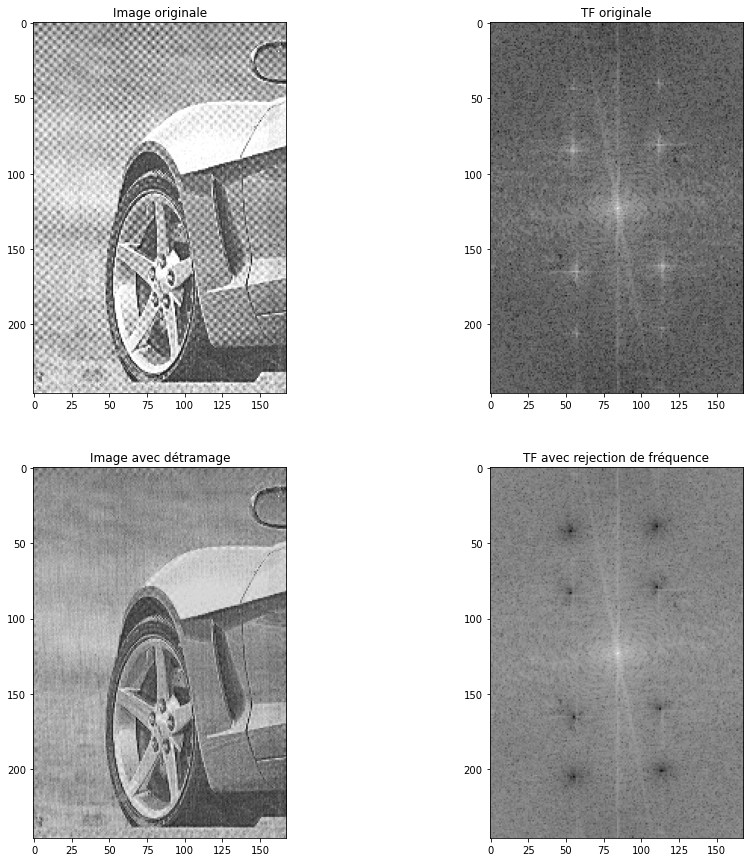

In [51]:
# Filtrage gaussien
D0 = 8
imageMod, fftMod = freqRejectionFilterGauss(image, coordinatesPixel, D0)
fftAmpMod = np.fft.fftshift(np.log(np.abs(fftMod) + 1))

fig, axs = plt.subplots(2,2, figsize=(15,15))
axs[0,0].imshow(image, cmap="gray")
axs[0,0].set_title("Image originale")
axs[0,1].imshow(fftAmp.astype("int"), cmap="gray")
axs[0,1].set_title("TF originale")
axs[1,0].imshow(imageMod.astype("int"), cmap="gray")
axs[1,0].set_title("Image avec d√©tramage")
axs[1,1].imshow(fftAmpMod, cmap="gray")
axs[1,1].set_title("TF avec rejection de fr√©quence")

Text(0.5, 1.0, 'TF avec rejection de fr√©quence')

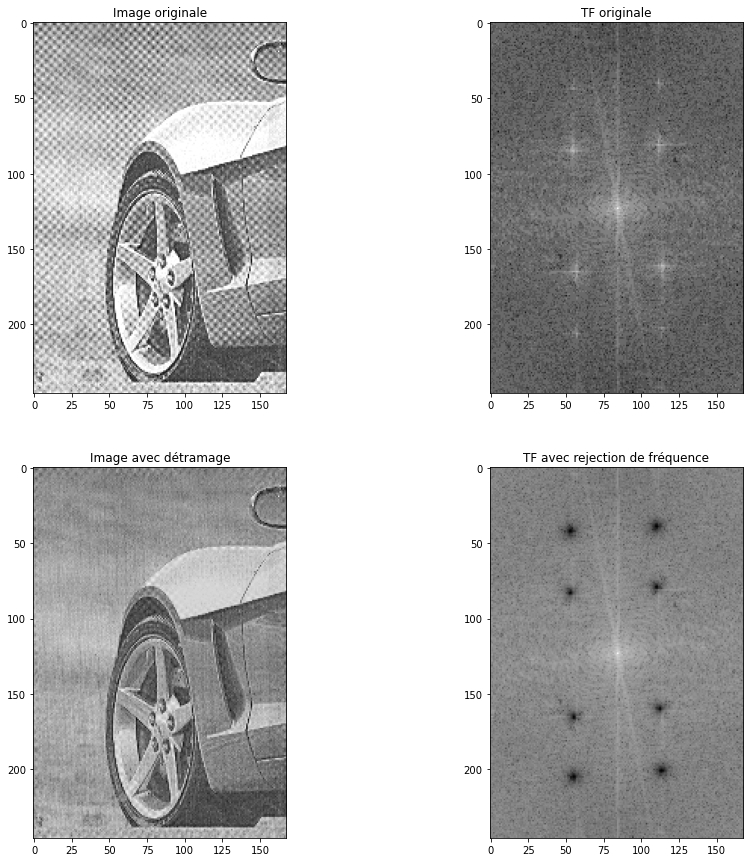

In [48]:
# Filtrage butterworth
D0 = 8
ordre = 2
imageMod, fftMod = freqRejectionFilterButter(image, coordinatesPixel, D0, ordre)
fftAmpMod = np.fft.fftshift(np.log(np.abs(fftMod) + 1))

fig, axs = plt.subplots(2,2, figsize=(15,15))
axs[0,0].imshow(image, cmap="gray")
axs[0,0].set_title("Image originale")
axs[0,1].imshow(fftAmp.astype("int"), cmap="gray")
axs[0,1].set_title("TF originale")
axs[1,0].imshow(imageMod.astype("int"), cmap="gray")
axs[1,0].set_title("Image avec d√©tramage")
axs[1,1].imshow(fftAmpMod, cmap="gray")
axs[1,1].set_title("TF avec rejection de fr√©quence")

<div class="alert alert-block alert-warning">



- Commentez les r√©sultats obtenus. 
   
</div>

<div class="alert alert-block alert-success"> 
En appliquant le d√©tramage, la qualit√© de l'image a √©t√© grandement restaur√©e. En effet, en observant la transform√©e de Fourrier de l'image originale, il est possible de constater la pr√©sence de bruit p√©riodique autour de certaines fr√©quences. En appliquant un filtrage √† ces fr√©quences, le bruit a donc √©t√© grandement r√©duit. 
</div>